# Data preprocessing

## Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

## Data

In [2]:
rw_sls = pd.read_csv('sales.csv')
rw_sku = pd.read_csv('sku.csv')
rw_test = pd.read_csv('test.csv')

### SKU

In [3]:
rw_sku.head()

,SKU,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group
0,24,Pomegranate,Tropical fruit — Pomegranate— Plain,NaN,1.0,NaN,NaN,NaN,Tropical fruits
1,208,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,1241.0,1.5,NaN,3670.0,1.0,Mineral water
2,1008,"Water, import, sparkling",Therapeutic-table water — Import — Glass,1241.0,0.5,NaN,4970.0,14.0,Mineral water
3,16649,"Water, still",Table water — PET — from 1 to 2 L — Still,1241.0,1.5,NaN,1323.0,1.0,Mineral water
4,20872,"Water, sparkling",Therapeutic-table water — PET — from 1 to 2 L,2693.0,1.5,NaN,4384.0,1.0,Mineral water


In [4]:
rw_sku.describe(include='all')

,SKU,Category,Type,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin,Group
count,60.000000,55,55,32.000000,60.000000,0.0,49.000000,33.000000,60
unique,NaN,39,38,NaN,NaN,NaN,NaN,NaN,5
top,NaN,Semi-hard coarse-pored cheese,semi-hard cheese — More expensive — National —...,NaN,NaN,NaN,NaN,NaN,Bakery
freq,NaN,4,5,NaN,NaN,NaN,NaN,NaN,21
mean,386478.483333,NaN,NaN,3599.625000,129.254167,NaN,7092.285714,6.878788,NaN
std,288483.152114,NaN,NaN,2648.397674,169.380298,NaN,4753.617202,10.361460,NaN
min,24.000000,NaN,NaN,967.000000,0.500000,NaN,297.000000,1.000000,NaN
25%,63214.000000,NaN,NaN,1330.000000,1.000000,NaN,2781.000000,1.000000,NaN
50%,406352.500000,NaN,NaN,2737.000000,2.000000,NaN,6133.000000,1.000000,NaN
75%,639679.750000,NaN,NaN,4677.500000,300.000000,NaN,9666.000000,14.000000,NaN


### SALES

In [5]:
rw_sls.head()

,ID,geoCluster,SKU,date,price,sales
0,RR27956459,92,32485,2021-07-05,38.29,4.0
1,RR27956474,92,32549,2021-07-05,89.39,0.5
2,RR27956489,112,32485,2021-05-27,45.39,3.7
3,RR27956490,112,32485,2021-05-28,NaN,NaN
4,RR27956491,112,32485,2021-05-29,NaN,NaN


In [6]:
rw_sls.describe(include="all")

,ID,geoCluster,SKU,date,price,sales
count,4605985,4.605985e+06,4.605985e+06,4605985,778366.000000,778366.000000
unique,4605985,NaN,NaN,552,NaN,NaN
top,RR27956459,NaN,NaN,2021-07-05,NaN,NaN
freq,1,NaN,NaN,14361,NaN,NaN
mean,NaN,2.220031e+03,3.671353e+05,NaN,67.490666,3.593748
std,NaN,2.459249e+02,3.005135e+05,NaN,85.631611,4.627158
min,NaN,9.200000e+01,2.400000e+01,NaN,0.000000,0.001000
25%,NaN,2.049000e+03,3.946500e+04,NaN,24.190000,1.000000
50%,NaN,2.158000e+03,3.637130e+05,NaN,38.490000,2.500000
75%,NaN,2.269000e+03,6.427000e+05,NaN,61.890000,4.000000


### TEST

In [7]:
rw_test.head()

,ID,geoCluster,SKU,date,price_filled,sales
0,RR27956447,21,32485,2021-07-08,39.69,NaN
1,RR27956448,21,32485,2021-07-09,39.69,NaN
2,RR27956449,21,32485,2021-07-10,39.69,NaN
3,RR27956450,21,32485,2021-07-11,39.69,NaN
4,RR27956451,21,32485,2021-07-12,39.69,NaN


In [8]:
rw_test.describe(include="all")

,ID,geoCluster,SKU,date,price_filled,sales
count,202737,202737.000000,202737.000000,202737,202737.000000,0.0
unique,202737,NaN,NaN,14,NaN,NaN
top,RR27956447,NaN,NaN,2021-07-19,NaN,NaN
freq,1,NaN,NaN,14589,NaN,NaN
mean,NaN,2244.779517,367044.202449,NaN,79.675751,NaN
std,NaN,359.694670,300460.823849,NaN,98.742848,NaN
min,NaN,21.000000,24.000000,NaN,0.000000,NaN
25%,NaN,2052.000000,39465.000000,NaN,23.690000,NaN
50%,NaN,2184.000000,363713.000000,NaN,39.690000,NaN
75%,NaN,2310.000000,642700.000000,NaN,68.090000,NaN


## Preprocessing

### Cleaning

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='sales'>

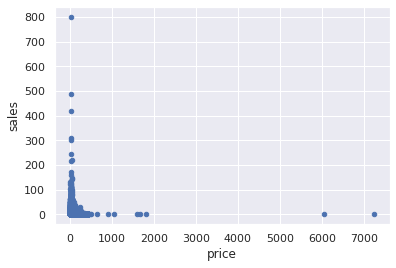

In [90]:
rw_sls.plot.scatter(x="price", y="sales")

In [9]:
rw_sls.isnull().sum()

ID                  0
geoCluster          0
SKU                 0
date                0
price         3827619
sales         3827619
dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='price', ylabel='sales'>

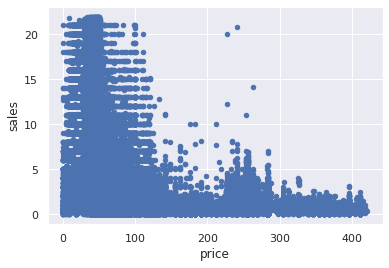

In [91]:
q = rw_sls['price'].quantile(0.99)
j = rw_sls['sales'].quantile(0.99)
cl_sls = rw_sls[rw_sls['price']<q]
cl_sls = cl_sls[cl_sls['sales']<j]

cl_sls.plot.scatter(x="price", y="sales")

In [10]:
filled = rw_sls.copy()
filled["price"] = filled["price"].fillna(67.490666 + np.random.uniform(-1,1) * 85.631611) # mean + random(0,1) * std
filled["sales"] = filled["sales"].fillna(3.593748 + np.random.uniform(-1,1) * 4.627158) # mean + random(0,1) * std
filled

,ID,geoCluster,SKU,date,price,sales
0,RR27956459,92,32485,2021-07-05,38.290000,4.000000
1,RR27956474,92,32549,2021-07-05,89.390000,0.500000
2,RR27956489,112,32485,2021-05-27,45.390000,3.700000
3,RR27956490,112,32485,2021-05-28,87.422699,1.770718
4,RR27956491,112,32485,2021-05-29,87.422699,1.770718
...,...,...,...,...,...,...
4605980,RR55912525,3230,711838,2021-07-01,28.490000,5.000000
4605981,RR55912526,3230,711838,2021-07-02,28.490000,11.000000
4605982,RR55912527,3230,711838,2021-07-03,28.490000,2.000000
4605983,RR55912528,3230,711838,2021-07-04,28.490000,6.000000


In [12]:
filled = rw_sls.copy()
filled.update(toup)

In [16]:
filled.to_csv('sales_filled.csv', index=False)

### Polynomial

In [66]:
dropped = cl_sls.dropna()
dropped.isnull().sum()

ID            0
geoCluster    0
SKU           0
date          0
price         0
sales         0
dtype: int64

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)


In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

poly = PolynomialFeatures(degree=9)
X_F1_poly = poly.fit_transform(dropped["price"].to_numpy().reshape(-1,1))

X_F1 = dropped["price"].to_numpy().reshape(1,-1)[0]
y_F1 = dropped["sales"].to_numpy().reshape(1,-1)[0]

#X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
#                                                   random_state = 0)

model = np.poly1d(np.polyfit(X_F1,y_F1,3))

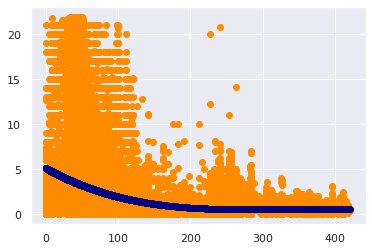

In [89]:
plt.scatter(X_F1, y_F1, color = "darkorange", label = "data")
plt.scatter(X_F1, model(X_F1), color = "navy", label = "prediction")

In [94]:
c1 = rw_sls["price"].median()
c2 = rw_sls["price"].std()

toup = rw_sls.copy()
toup["price"] = toup["price"].apply(lambda x: abs(c1 + np.random.uniform(-1,1) * c2)) # mean + random(0,1) * std
toup["sales"] = toup["price"].apply(lambda x: model(x)) # mean + random(0,1) * std

In [95]:
toup.describe(include="all")

,ID,geoCluster,SKU,date,price,sales
count,4605985,4.605985e+06,4.605985e+06,4605985,4.605985e+06,4.605985e+06
unique,4605985,NaN,NaN,552,NaN,NaN
top,RR27956459,NaN,NaN,2021-07-05,NaN,NaN
freq,1,NaN,NaN,14361,NaN,NaN
mean,NaN,2.220031e+03,3.671353e+05,NaN,5.146647e+01,3.351387e+00
std,NaN,2.459249e+02,3.005135e+05,NaN,3.573023e+01,1.059250e+00
min,NaN,9.200000e+01,2.400000e+01,NaN,1.845491e-05,1.527037e+00
25%,NaN,2.049000e+03,3.946500e+04,NaN,2.141102e+01,2.381149e+00
50%,NaN,2.158000e+03,3.637130e+05,NaN,4.280405e+01,3.479215e+00
75%,NaN,2.269000e+03,6.427000e+05,NaN,8.131546e+01,4.243614e+00


In [96]:
cl_sls.update(toup)
cl_sls.describe(include="all")

,ID,geoCluster,SKU,date,price,sales
count,757936,757936.000000,757936.000000,757936,757936.000000,757936.000000
unique,757936,NaN,NaN,464,NaN,NaN
top,RR27956459,NaN,NaN,2021-04-15,NaN,NaN
freq,1,NaN,NaN,3649,NaN,NaN
mean,NaN,2230.227985,320378.784725,NaN,51.476835,3.350950
std,NaN,268.249510,295883.155727,NaN,35.716859,1.058781
min,NaN,92.000000,24.000000,NaN,0.000053,1.527041
25%,NaN,2041.000000,32549.000000,NaN,21.430741,2.381773
50%,NaN,2131.000000,221793.000000,NaN,42.810162,3.479013
75%,NaN,2279.000000,591899.000000,NaN,81.289689,4.242855
